# Jyväskylän kaupungin ostot 2012-2021 <a name="header1"></a>

## Sisältö
1. [Johdanto](#introduction)
2. [Aineistoon tutustuminen](#paragraph1)
3. [Aineiston esikäsittely ja siivoaminen](#paragraph2)    
    1. [Sarakkeiden päivittäminen](#subparagraph1)      
    2. [Datan yhdistäminen](#subparagraph2)    
    3. [Tietotyyppien ja arvojen tarkastelu](#subparagraph3)  
    4. [Puuttuvien arvojen käsittely](#subparagraph4)  
4. [Datan analysointi](#paragraph3)
    

    
    


## Johdanto <a name="introduction"></a>

Tässä tehtävässä tutkitaan Jyväskylän kaupungin ostolaskuja vuosilta 2012-2021. Aineistoa analysoidaan Pythonilla, ja sitä havainnollistetaan erilaisten visualisointien ja taulukoiden avulla. Tämä muistio (*notebook*) on luotu JupyterLabilla.

Harjoituksessa on käytetty aineistona Jyväskylän kaupungin ostolaskuja vuosilta 2012-2021. Tiedot on tuotu Excel-tiedostoista, jotka on ladattu 9.5.2023 Jyväskylän kaupungin avoimen datan palvelusta osoitteesta https://data.jyvaskyla.fi/data.php. Aineistosta kerrotaan sivustolla seuraavasti: 

> Tiedoissa on mukana kaupungin kaikki toimialat ja liikelaitokset. Tiedot sisältävät ostolaskutiedot sekä luottokorttiostotiedot. Ostotiedot on poimittu ostolaskujen käsittelyjärjestelmästä ja kirjanpidosta ulkoisten palvelujen ja tarvikkeiden sekä käyttöomaisuusostojen tileiltä.
>
> Tiedot mahdollistavat kaupungin hankintojen (ostojen) tarkastelun palvelualueittain toimittaja- ja tilitasoilla. Suodattamalla tietoja voidaan vertailla ostojen toteutumia erilaisten tietojen perusteella.   
>
> Luottokorttiostotiedot eivät sisällä toimittajanumeroa ja kaikkien luottokorttiostojen osalta emme saa ostopaikkatietoja ilman yksittäisten tositteiden läpikäyntiä. Y-tunnustieto puuttuu henkilötoimittajien ja luottokorttiostojen osalta.    
>
> Ylläpitäjä ja yhteys:   
> ostotiedot[at]jkl.fi    

Aineisto ei ole täydellistä, vaan se sisältää puuttuvia arvoja ja kirjoitusvirheitä, ja ostoja on kirjattu eri vuosina hieman erinimisille vastuualueille ja tileille. Apua näiden epäselvyyksien tulkintaan on ystävällisesti antanut Jyväskylän kaupungin taloussuunnittelupäällikkö Erikka Saastamoinen. Parhaasta yrityksestä huolimatta on mahdollista, että kaupungin organisaatiorakennetta vastuualueineen ja tulosyksiköineen on tässä tulkittu paikoin väärin. Mahdolliset virheet ovat omiani.

Huomaathan, että jos haluat ajaa tämän Jupyter-tiedoston koodit omalla koneellasi, aineiston latautumisessa ja käsittelyssä kestää useita minuutteja. 

[Takaisin alkuun](#header1)

## Aineistoon tutustuminen <a name="paragraph1"></a>

Ensimmäisessä vaiheessa ladataan ostolaskutiedot sisältävät Excel-tiedostot, ja luetaan ne jatkojalostusta varten datakehikkoihin (dataframe). Tämn jälkeen tulostetaan kunkin datakehikon ensimmäiset rivit ja katsotaan, millaista tietoa ne sisältävät.

In [2]:
# Tuodaan tarvittavat kirjastot:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Ladataan ostodatatiedostot dataframeihin:

df_21 = pd.read_excel("ostot_2021.xlsx")
df_20 = pd.read_excel("ostot_2020.xlsx")
df_19 = pd.read_excel("ostot_2019.xlsx")
df_18 = pd.read_excel("ostot_2018_final.xlsx")
df_17 = pd.read_excel("ostot_2017.xlsx")
df_16 = pd.read_excel("Ostot_2016_final_v1.0.xlsx")
df_15 = pd.read_excel("ostot2015_julkaistavaksi.xlsx")
df_14 = pd.read_excel("ostot_2014.xlsx")
df_13 = pd.read_excel("ostot_2013.xlsx")
df_12 = pd.read_excel("ostot_2012.xlsx")

/Users/salla/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [4]:
# Katsotaan dataframejen viisi ensimmäistä riviä:

print("2021: ", df_21.head())
print("\n\n\n2020: ", df_20.head())
print("\n\n\n2019: ", df_19.head())
print("\n\n\n2018: ", df_18.head())
print("\n\n\n2017: ", df_17.head())
print("\n\n\n2016: ", df_16.head())
print("\n\n\n2015: ", df_15.head())
print("\n\n\n2014: ", df_14.head())
print("\n\n\n2013: ", df_13.head())
print("\n\n\n2012: ", df_12.head())

2021:     Kuntanumero         Kunnan nimi  Kunnan y-tunnus        Vastuualue  \
0        179.0  Jyväskylän kaupunki       0174666-4  Konsernihallinto   
1        179.0  Jyväskylän kaupunki       0174666-4  Konsernihallinto   
2        179.0  Jyväskylän kaupunki       0174666-4  Konsernihallinto   
3        179.0  Jyväskylän kaupunki       0174666-4  Konsernihallinto   
4        179.0  Jyväskylän kaupunki       0174666-4  Konsernihallinto   

   Tulosyksikkö   Tulosyksikön nimi  Toimittajan nimi Toimittajan y-tunnus  \
0   100010001.0  Kaupunginvaltuusto  KEPIT SYSTEMS OY            2040024-7   
1   100010001.0  Kaupunginvaltuusto  KEPIT SYSTEMS OY            2040024-7   
2   100010001.0  Kaupunginvaltuusto  KEPIT SYSTEMS OY            2040024-7   
3   100010001.0  Kaupunginvaltuusto     VALTERI-KOULU            2718015-2   
4   100010001.0  Kaupunginvaltuusto     VALTERI-KOULU            2718015-2   

  Toimittajan maakoodi                  Tiliryhmä      Tili  \
0                   FI

In [5]:
# Katsotaan, kuinka monta riviä datat sisältävät:
print("Vuosi 2021:", len(df_21.index), "riviä")
print("Vuosi 2020:", len(df_20.index), "riviä")
print("Vuosi 2019:", len(df_19.index), "riviä")
print("Vuosi 2018:", len(df_18.index), "riviä")
print("Vuosi 2021:", len(df_17.index), "riviä")
print("Vuosi 2017:", len(df_16.index), "riviä")
print("Vuosi 2016:", len(df_15.index), "riviä")
print("Vuosi 2015:", len(df_14.index), "riviä")
print("Vuosi 2014:", len(df_13.index), "riviä")
print("Vuosi 2013:", len(df_12.index), "riviä")


Vuosi 2021: 223295 riviä
Vuosi 2020: 128704 riviä
Vuosi 2019: 140101 riviä
Vuosi 2018: 226319 riviä
Vuosi 2021: 213100 riviä
Vuosi 2017: 213972 riviä
Vuosi 2016: 200866 riviä
Vuosi 2015: 194125 riviä
Vuosi 2014: 207808 riviä
Vuosi 2013: 205600 riviä


[Takaisin alkuun](#header1)

## Aineiston esikäsittely ja siivoaminen <a name="paragraph2"></a>

Yllä olevat tulosteet datakehikoiden aluista osoittavat, että ostolaskuiedostot on laadittu hieman eri tavoin eri vuosina. Analyysiä varten aineistoa on tarpeen yhtenäistää ja siivota, ja koostaa kaikkien vuosien aineisto lopulta yhteen datakehikkoon *'df'*. Jatkokäyttöä varten siihen otetaan ainoastaan seuraavat sarakkeet: *'Vuosi'* (uusi sarake), *'Vastuualue'*, *'Toimittajan nimi'*, *'Tiliryhmä'*, *'Tilin nimi'* sekä *'Nettosumma'*. Tässä vaiheessa myös varmistetaan, että sarakkeiden tietotyypit ovat tarkoituksenmukaiset, ja että aineiston sisältämät puuttuvat arvot käsitellään asianmukaisesti.     

### Sarakkeiden päivittäminen <a name="subparagraph1"></a>  

Seuraavassa käydään vuosittaiset datakehikot yksi kerrallaan läpi, ja tehdään kuhunkin tarvittavat muutokset niin, että kuhunkin jää jäljelle halutut kuusi saraketta.

In [6]:
# Katsotaan dataframejen sarakkeiden nimet:
print("2021: ", list(df_21.columns))
print("2020: ", list(df_20.columns))
print("2019: ", list(df_19.columns))
print("2018: ", list(df_18.columns))
print("2017: ", list(df_17.columns))
print("2016: ", list(df_16.columns))
print("2015: ", list(df_15.columns))
print("2014: ", list(df_14.columns))
print("2013: ", list(df_13.columns))
print("2012: ", list(df_12.columns))


2021:  ['Kuntanumero', 'Kunnan nimi ', 'Kunnan y-tunnus', 'Vastuualue', 'Tulosyksikkö', 'Tulosyksikön nimi', 'Toimittajan nimi', 'Toimittajan y-tunnus', 'Toimittajan maakoodi', 'Tiliryhmä', 'Tili', 'Tilin nimi', 'JHS-tili', 'JHS-tilin nimi', 'Laskun summa ilman ALV', 'Kirjauspäivämäärä', 'Palveluluokka']
2020:  ['Vastuualue', 'Toimittaja nro', 'Y-tunnus', 'Toimittajan nimi', 'Tiliryhmä', 'Tili', 'Tilin nimi', 'Nettosumma', 'Kirjauspvm', 'Postinumero ']
2019:  ['Vastuualue', 'Toimittaja nro', 'Y-tunnus', 'Toimittajan nimi', 'Tiliryhmä', 'Tili', 'Tilin nimi', 'Nettosumma', 'Kirjauspäivämäärä']
2018:  ['Vastuualue', 'Toimittaja nro', 'Y-tunnus', 'Toimittajan nimi', 'Tiliryhmä', 'Tili', 'Tilin nimi', 'Nettosumma', 'Kirjauspäivä']
2017:  ['Vastuualue', 'Toimittaja nro', 'Y-tunnus', 'Toimittajan nimi', 'Tiliryhmä', 'Tili', 'Tilin nimi', 'Nettosumma', 'Kirjauspäivä']
2016:  ['Vastuualue', 'Toimittaja  nro', 'Y-tunnus', 'Toimittajan nimi', 'Tiliryhmä', 'Tili nro', 'Tilin nimi', 'Netto', 'Unnam

In [7]:
# df_21:

# Poistetaan ylimääräiset sarakkeet, ja tallennetaan jäljelle jäävät tiedot uuteen dataframeen:   
df_21a = df_21.drop(['Kuntanumero', 'Kunnan nimi ', 'Kunnan y-tunnus', 'Tulosyksikkö', \
                    'Tulosyksikön nimi', 'Toimittajan y-tunnus', 'Toimittajan maakoodi', \
                    'Tili', 'JHS-tili', 'JHS-tilin nimi', 'Kirjauspäivämäärä', \
                    'Palveluluokka'], axis = 1)

# Vaihdetaan 'Laskun summa ilman ALV' nimeksi 'Nettosumma':
df_21a.rename(columns = {'Laskun summa ilman ALV': 'Nettosumma'}, inplace = True)

# Lisätään sarake 'Vuosi':
df_21a.insert(loc = 0, column = 'Vuosi', value = '2021')

df_21a.head()

,Vuosi,Vastuualue,Toimittajan nimi,Tiliryhmä,Tilin nimi,Nettosumma
0,2021,Konsernihallinto,KEPIT SYSTEMS OY,Ulkoiset palvelujen ostot,Asiantuntijapalvelut,1770.00
1,2021,Konsernihallinto,KEPIT SYSTEMS OY,Ulkoiset palvelujen ostot,Asiantuntijapalvelut,1100.00
2,2021,Konsernihallinto,KEPIT SYSTEMS OY,Ulkoiset palvelujen ostot,Asiantuntijapalvelut,850.00
3,2021,Konsernihallinto,VALTERI-KOULU,Ulkoiset palvelujen ostot,Asiantuntijapalvelut,1215.56
4,2021,Konsernihallinto,VALTERI-KOULU,Ulkoiset palvelujen ostot,Asiantuntijapalvelut,1130.68


In [8]:
# df_20:

# Tallennetaan tarvittavat sarakkeet uuteen dataframeen:   
df_20a = df_20[['Vastuualue', 'Toimittajan nimi', 'Tiliryhmä', 'Tilin nimi', 'Nettosumma']]

# Lisätään sarake 'Vuosi':
df_20a.insert(loc = 0, column = 'Vuosi', value = '2020')

df_20a.head()

,Vuosi,Vastuualue,Toimittajan nimi,Tiliryhmä,Tilin nimi,Nettosumma
0,2020,Konsernihallinto,SODEXO OY,Ulkoiset palvelujen ostot,Majoitus- ja ravitsemispalvelut,174.70
1,2020,Konsernihallinto,SODEXO OY,Ulkoiset palvelujen ostot,Majoitus- ja ravitsemispalvelut,991.24
2,2020,Konsernihallinto,SODEXO OY,Ulkoiset palvelujen ostot,Majoitus- ja ravitsemispalvelut,385.26
3,2020,Konsernihallinto,SODEXO OY,Ulkoiset palvelujen ostot,Majoitus- ja ravitsemispalvelut,59.39
4,2020,Konsernihallinto,LM TIETOPALVELUT,"Ulkoiset aineet, tarvikkeet ja tavarat",Kirjallisuus,304.31


In [9]:
# df_19:

# Tallennetaan tarvittavat sarakkeet uuteen dataframeen:   
df_19a = df_19[['Vastuualue', 'Toimittajan nimi', 'Tiliryhmä', 'Tilin nimi', 'Nettosumma']]

# Lisätään sarake 'Vuosi':
df_19a.insert(loc = 0, column = 'Vuosi', value = '2019')

df_19a.head()

,Vuosi,Vastuualue,Toimittajan nimi,Tiliryhmä,Tilin nimi,Nettosumma
0,2019,Sosiaali- ja terveyspalvelut,014-KULJETUS OY,Ulkoisten palvelujen ostot,Posti- ja kuriiripalvelut,6679.52
1,2019,Sosiaali- ja terveyspalvelut,014-KULJETUS OY,Ulkoisten palvelujen ostot,Sosiaali- ja terveyspalvelut,6691.01
2,2019,Sosiaali- ja terveyspalvelut,014-KULJETUS OY,Ulkoisten palvelujen ostot,Sosiaali- ja terveyspalvelut,6648.88
3,2019,Sosiaali- ja terveyspalvelut,A. JA K. KAUPPINEN OY,Ulkoiset aineet ja tarvikkeet,Muu materiaali,40.16
4,2019,Liikuntapalvelut,A. JA K. KAUPPINEN OY,Ulkoisten palvelujen ostot,Rakennusten ja alueiden rakentamis- ja kunnoss...,2965.32


In [10]:
# df_18:

# Tallennetaan tarvittavat sarakkeet uuteen dataframeen:   
df_18a = df_18[['Vastuualue', 'Toimittajan nimi', 'Tiliryhmä', 'Tilin nimi', 'Nettosumma']]

# Lisätään sarake 'Vuosi':
df_18a.insert(loc = 0, column = 'Vuosi', value = '2018')

df_18a.head()

,Vuosi,Vastuualue,Toimittajan nimi,Tiliryhmä,Tilin nimi,Nettosumma
0,2018,"100, Konsernihallinto",HERTZ AUTOVERMIETUNG G ESCHBORN,Muut toimintakulut,Muut vuokrat,29.75
1,2018,"100, Konsernihallinto",HERTZ AUTOVERMIETUNG G ESCHBORN,Muut toimintakulut,Muut vuokrat,29.75
2,2018,"100, Konsernihallinto",HERTZ AUTOVERMIETUNG G ESCHBORN,Muut toimintakulut,Muut vuokrat,557.07
3,2018,"100, Konsernihallinto",HERTZ AUTOVERMIETUNG G ESCHBORN,Muut toimintakulut,Muut vuokrat,198.42
4,2018,"100, Konsernihallinto",HERTZ AUTOVERMIETUNG G ESCHBORN,Muut toimintakulut,Muut vuokrat,198.42


In [11]:
# df_17:

# Tallennetaan tarvittavat sarakkeet uuteen dataframeen:   
df_17a = df_17[['Vastuualue', 'Toimittajan nimi', 'Tiliryhmä', 'Tilin nimi', 'Nettosumma']]

# Lisätään sarake 'Vuosi':
df_17a.insert(loc = 0, column = 'Vuosi', value = '2017')

df_17a.head()

,Vuosi,Vastuualue,Toimittajan nimi,Tiliryhmä,Tilin nimi,Nettosumma
0,2017,"100, Konsernihallinto",SOVATEK-SÄÄTIÖ,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,152000.00
1,2017,"100, Konsernihallinto",SOVATEK-SÄÄTIÖ,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,152000.00
2,2017,"100, Konsernihallinto",SOVATEK-SÄÄTIÖ,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,142500.00
3,2017,"100, Konsernihallinto",SOVATEK-SÄÄTIÖ,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,142500.00
4,2017,"100, Konsernihallinto",SOVATEK-SÄÄTIÖ,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,136166.35


In [12]:
# df_16:

# Tallennetaan tarvittavat sarakkeet uuteen dataframeen:   
df_16a = df_16[['Vastuualue', 'Toimittajan nimi', 'Tiliryhmä', 'Tilin nimi', 'Netto']].copy()

# Vaihdetaan sarakkeen 'Netto' nimeksi 'Nettosumma':
df_16a.rename(columns = {'Netto': 'Nettosumma'}, inplace = True)

# Lisätään sarake 'Vuosi':
df_16a.insert(loc = 0, column = 'Vuosi', value = '2016')

df_16a.head()

,Vuosi,Vastuualue,Toimittajan nimi,Tiliryhmä,Tilin nimi,Nettosumma
0,2016,Altek Aluetekniikka,3D-SYSTEM OY,Ulkoisten palvelujen ostot,Toimisto- ja asiantuntijapalvelut,1328.50
1,2016,Altek Aluetekniikka,3D-SYSTEM OY,Ulkoisten palvelujen ostot,Toimisto- ja asiantuntijapalvelut,1328.50
2,2016,Altek Aluetekniikka,3D-SYSTEM OY,Ulkoisten palvelujen ostot,Koulutus- ja kulttuuripalvelut,1740.00
3,2016,Altek Aluetekniikka,AGA OY AB,Ulkoiset aineet ja tarvikkeet,Muu materiaali,396.48
4,2016,Altek Aluetekniikka,AGA OY AB,Ulkoiset aineet ja tarvikkeet,Muu materiaali,44.73


In [13]:
# df_15:

# Tallennetaan tarvittavat sarakkeet uuteen dataframeen:   
df_15a = df_15[['Vastuualue', 'Toimittajan nimi', 'Tiliryhmä', 'Tilin nimi', 'Netto']].copy()

# Vaihdetaan sarakkeen 'Netto' nimeksi 'Nettosumma':
df_15a.rename(columns = {'Netto': 'Nettosumma'}, inplace = True)

# Lisätään sarake 'Vuosi':
df_15a.insert(loc = 0, column = 'Vuosi', value = '2015')

df_15a.head()

,Vuosi,Vastuualue,Toimittajan nimi,Tiliryhmä,Tilin nimi,Nettosumma
0,2015,Altek Aluetekniikka,3D-SYSTEM OY,Ulkoisten palvelujen ostot,Koulutus- ja kulttuuripalvelut,540.0
1,2015,Altek Aluetekniikka,3D-SYSTEM OY,Ulkoisten palvelujen ostot,Koulutus- ja kulttuuripalvelut,950.0
2,2015,Altek Aluetekniikka,3D-SYSTEM OY,Ulkoisten palvelujen ostot,Koulutus- ja kulttuuripalvelut,1080.0
3,2015,Altek Aluetekniikka,3D-SYSTEM OY,Ulkoisten palvelujen ostot,Toimisto- ja asiantuntijapalvelut,1328.5
4,2015,Altek Aluetekniikka,3D-SYSTEM OY,Ulkoisten palvelujen ostot,Toimisto- ja asiantuntijapalvelut,1328.5


In [14]:
# df_14:

# Tallennetaan tarvittavat sarakkeet uuteen dataframeen:
# Huomataan, että sarake 'Netto' on muodossa 'Netto '
df_14a = df_14[['Vastuualue', 'Toimittajan nimi', 'Tiliryhmä', 'Tilin nimi', 'Netto ']].copy()

# Vaihdetaan sarakkeen 'Netto' nimeksi 'Nettosumma':
df_14a.rename(columns = {'Netto ': 'Nettosumma'}, inplace = True)

# Lisätään sarake 'Vuosi':
df_14a.insert(loc = 0, column = 'Vuosi', value = '2014')

df_14a.head()

,Vuosi,Vastuualue,Toimittajan nimi,Tiliryhmä,Tilin nimi,Nettosumma
0,2014,100 Konsernihallinto,4140 Gigantti Jyvaskyl Vantaa,Ulkoiset aineet ja tarvikkeet,Muu materiaali,19.84
1,2014,100 Konsernihallinto,4140 Gigantti Jyvaskyl Vantaa,Ulkoiset aineet ja tarvikkeet,Muu materiaali,39.95
2,2014,100 Konsernihallinto,AAC GLOBAL OY,Ulkoisten palvelujen ostot,"Toimisto-, pankki- ja asiantuntijapalvelut",70.00
3,2014,100 Konsernihallinto,AAC GLOBAL OY,Ulkoisten palvelujen ostot,"Toimisto-, pankki- ja asiantuntijapalvelut",70.00
4,2014,100 Konsernihallinto,AAC GLOBAL OY,Ulkoisten palvelujen ostot,"Toimisto-, pankki- ja asiantuntijapalvelut",70.00


In [15]:
# df_13:

# Tallennetaan tarvittavat sarakkeet uuteen dataframeen:
# Huomataan, että tässäkin sarake 'Netto' on muodossa 'Netto '
df_13a = df_13[['Vastuualue', 'Toimittajan nimi', 'Tiliryhmä', 'Tilin nimi', 'Netto ']].copy()

# Vaihdetaan sarakkeen 'Netto' nimeksi 'Nettosumma':
df_13a.rename(columns = {'Netto ': 'Nettosumma'}, inplace = True)

# Lisätään sarake 'Vuosi':
df_13a.insert(loc = 0, column = 'Vuosi', value = '2013')

df_13a.head()

,Vuosi,Vastuualue,Toimittajan nimi,Tiliryhmä,Tilin nimi,Nettosumma
0,2013,100 Konsernihallinto,141 Tokmanni Forum Jyvaskyla,Muut toimintakulut,Muut kulut,6.97
1,2013,100 Konsernihallinto,141 Tokmanni Forum Jyvaskyla,Muut toimintakulut,Muut kulut,5.78
2,2013,100 Konsernihallinto,4040 Gigantti Jyvaskyl Vantaa,"Aineet, tarvikkeet ja tavarat",Muu materiaali,39.90
3,2013,100 Konsernihallinto,4140 Gigantti Jyvaskyl Vantaa,"Aineet, tarvikkeet ja tavarat",Muu materiaali,20.08
4,2013,100 Konsernihallinto,9SOLUTIONS OY,Ulkoiset aineet ja tarvikkeet,Toimisto- ja koulutarvikkeet,249.65


In [16]:
# df_12:

# Tallennetaan tarvittavat sarakkeet uuteen dataframeen:
# Huomataan, että myös tässä sarake 'Netto' on muodossa 'Netto '
df_12a = df_12[['Vastuualue', 'Toimittajan nimi', 'Tiliryhmä', 'Tilin nimi', 'Netto ']].copy()

# Vaihdetaan sarakkeen 'Netto' nimeksi 'Nettosumma':
df_12a.rename(columns = {'Netto ': 'Nettosumma'}, inplace = True)

# Lisätään sarake 'Vuosi':
df_12a.insert(loc = 0, column = 'Vuosi', value = '2012')

df_12a.head()

,Vuosi,Vastuualue,Toimittajan nimi,Tiliryhmä,Tilin nimi,Nettosumma
0,2012,100 Konsernihallinto,2weel4e1 KY,Ulkoisten palvelujen ostot,Muut palvelut,2200.00
1,2012,100 Konsernihallinto,4EVENT OY,Ulkoisten palvelujen ostot,Opetus- ja kulttuuripalvelut,765.00
2,2012,100 Konsernihallinto,4EVENT OY,Ulkoisten palvelujen ostot,Muut palvelut,942.00
3,2012,100 Konsernihallinto,9SOLUTIONS OY,Valmiin käyttöomaisuuden ostot,Tietokonelaitteet,887.40
4,2012,100 Konsernihallinto,AAC GLOBAL OY,Ulkoisten palvelujen ostot,"Toimisto-, pankki- ja asiantuntijapalvelut",124.88


[Takaisin alkuun](#header1)

### Datan yhdistäminen <a name="subparagraph2"></a>  

Muodostetaan vuosikohtaisista datakehikoista yksi iso datakehikko *'df'*:

In [17]:
df = pd.concat([df_21a, df_20a, df_19a, df_18a, df_17a, df_16a, df_15a, df_14a, df_13a, \
                df_12a], axis=0)

print("Alku:", df.head())
print("Loppu:", df.tail())

Alku:   Vuosi        Vastuualue  Toimittajan nimi                  Tiliryhmä  \
0  2021  Konsernihallinto  KEPIT SYSTEMS OY  Ulkoiset palvelujen ostot   
1  2021  Konsernihallinto  KEPIT SYSTEMS OY  Ulkoiset palvelujen ostot   
2  2021  Konsernihallinto  KEPIT SYSTEMS OY  Ulkoiset palvelujen ostot   
3  2021  Konsernihallinto     VALTERI-KOULU  Ulkoiset palvelujen ostot   
4  2021  Konsernihallinto     VALTERI-KOULU  Ulkoiset palvelujen ostot   

             Tilin nimi  Nettosumma  
0  Asiantuntijapalvelut     1770.00  
1  Asiantuntijapalvelut     1100.00  
2  Asiantuntijapalvelut      850.00  
3  Asiantuntijapalvelut     1215.56  
4  Asiantuntijapalvelut     1130.68  
Loppu:        Vuosi                   Vastuualue  \
205595  2012  800 Kaupunkirakennepalvelut   
205596  2012  800 Kaupunkirakennepalvelut   
205597  2012  800 Kaupunkirakennepalvelut   
205598  2012  800 Kaupunkirakennepalvelut   
205599  2012  800 Kaupunkirakennepalvelut   

                           Toimittajan nimi

In [18]:
# Tarkastetaan saadun dataframen muoto:
df.shape

(1953890, 6)

Edellä koko ostolaskuaineisto saatiin tallennettua yhteen datakehikkoon *'df'*. Kyseisessä datakehikossa on nyt vajaa kaksi miljoonaa riviä ja kuusi saraketta, mikä kuulostaa oikealta.    

[Takaisin alkuun](#header1)

### Tietotyyppien ja arvojen tarkastelu <a name="subparagraph3"></a>  

Seuraavaksi sarakkeita tutkitaan tarkemmin ja katsotaan, että niiden tietotyypit ovat oikein. 

In [19]:
# Tarkastetaan sarakkeiden tietotyypit:
df.dtypes

Vuosi                object
Vastuualue           object
Toimittajan nimi     object
Tiliryhmä            object
Tilin nimi           object
Nettosumma          float64
dtype: object

Sarakkeiden tietotyypit ovat kunnossa. Vaikka vuosiluvut ovat numeroita, niitä ei käytetä tässä laskentaan, joten tietotyyppi *'object'* käy hyvin. 

Katsotaan seuraavaksi, millaisia yksilöllisiä arvoja kussakin sarakkeessa on:

In [20]:
pd.unique(df['Vuosi'])

array(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012'], dtype=object)

In [21]:
pd.unique(df['Vastuualue'])

array(['Konsernihallinto', 'Kaupunkirakenne',
       'Sosiaali- ja terveyspalvelut', 'Kasvun ja oppimisen palvelut',
       'Kulttuuri- ja liikuntapalvelut', 'Kulttuuripalvelut',
       'Liikuntapalvelut', 'Perusturva', 'Tilapalvelu-liikelaitos',
       'Keski-Suomen pelastuslaitos-liikelaitos',
       'Kylän Kattaus-liikelaitos', nan,
       'Altek Aluetekniikka-liikelaitos', 'K-S Pelastuslaitos',
       'Kaupunkirakennepalvelut', 'Jyväskylän Tilapalvelu',
       'Altek Aluetekniikka', 'Kylän Kattaus', 'K-S pelastuslaitos',
       '100, Konsernihallinto', '1001, Jyväskylän Tilapalvelu',
       '1002, Työterveys Aalto', '1003, K-S Pelastuslaitos',
       '1004, Kylän Kattaus', '1005, Altek Aluetekniikka',
       '1007, Talouskeskus-liikelaitos',
       '400, Sosiaali- ja terveyspalvelut',
       '500, Kasvun ja oppimisen palvelut', '600, Kulttuuripalvelut',
       '700, Liikuntapalvelut', '800, Kaupunkirakennepalvelut',
       '900, Konsernihallinto /Kankaan alue', '1007, Talouskeskus'

Sarakkeen *'Vastuualue'* arvoista havaitaan, että vastuualueiden nimeämiskäytäntö on mitä ilmeisimmin muuttunut vuosien varrella. Voidaan olettaa, että esimerkiksi *'Konsernihallinto'* ja *'100, Konsernihallinto'* ja *'Liikuntapalvelut'* sekä *'700 Liikuntapalvelut'* ovat samoja vastuualueita.    

Siivotaan tätä saraketta nimeämällä arvot yhdenmukaisesti ja poistamalla numerotunnukset nimien edestä.

In [22]:
# Muutetaan sarakkeen 'Vastuualue' arvot yhtenäisemmiksi:
df['Vastuualue'].replace({'Kaupunkirakenne': 'Kaupunkirakennepalvelut',
                          'Tilapalvelu-liikelaitos': 'Jyväskylän Tilapalvelu',
                          'Keski-Suomen pelastuslaitos-liikelaitos': 'K-S Pelastuslaitos',
                          'Kylän Kattaus-liikelaitos': 'Kylän Kattaus',
                          'Altek Aluetekniikka-liikelaitos': 'Altek Aluetekniikka', 
                          'K-S pelastuslaitos': 'K-S Pelastuslaitos',
                          '100, Konsernihallinto': 'Konsernihallinto',
                          '1001, Jyväskylän Tilapalvelu': 'Jyväskylän Tilapalvelu',
                          '1002, Työterveys Aalto': 'Työterveys Aalto',
                          '1003, K-S Pelastuslaitos': 'K-S Pelastuslaitos',
                          '1004, Kylän Kattaus': 'Kylän Kattaus',
                          '1005, Altek Aluetekniikka': 'Altek Aluetekniikka',
                          '1007, Talouskeskus-liikelaitos': 'Talouskeskus',
                          '400, Sosiaali- ja terveyspalvelut': 'Sosiaali- ja terveyspalvelut',
                          '500, Kasvun ja oppimisen palvelut': 'Kasvun ja oppimisen palvelut', 
                          '600, Kulttuuripalvelut': 'Kulttuuripalvelut',
                          '700, Liikuntapalvelut': 'Liikuntapalvelut', 
                          '800, Kaupunkirakennepalvelut': 'Kaupunkirakennepalvelut',
                          '900, Konsernihallinto /Kankaan alue': 'Konsernihallinto / Kankaan alue',
                          '1007, Talouskeskus': 'Talouskeskus',
                          'Kapunkirakenteen toimiala': 'Kaupunkirakennepalvelut', 
                          'Kaupunkirakenteen toimiala': 'Kaupunkirakennepalvelut',
                          'Tilapalvelu': 'Jyväskylän Tilapalvelu',
                          '100 Konsernihallinto': 'Konsernihallinto', 
                          '1001 Tilapalvelu': 'Jyväskylän Tilapalvelu',
                          '1002 Työterveys Aalto': 'Työterveys Aalto', 
                          '1003 K-S Pelastulaitos': 'K-S Pelastuslaitos',
                          '1004 Kylän Kattaus': 'Kylän Kattaus', 
                          '1005 Altek Aluetekniikka': 'Altek Aluetekniikka',
                          '1007 Talouskeskus': 'Talouskeskus', 
                          '400 Sosiaali- ja terveyspalvelut': 'Sosiaali- ja terveyspalvelut',
                          '500 Kasvun- ja oppimisenpalvelut': 'Kasvun ja oppimisen palvelut', 
                          '600 Kulttuuripalvelut': 'Kulttuuripalvelut',
                          '700 Liikuntapalvelut': 'Liikuntapalvelut', 
                          '800 Kaupunkirakennepalvelut': 'Kaupunkirakennepalvelut',
                          '1003 K-S Pelastuslaitos': 'K-S Pelastuslaitos', 
                          '800 Kaupunkirakennepalvelu': 'Kaupunkirakennepalvelut'
                         }, inplace = True)

In [23]:
pd.unique(df['Vastuualue'])

array(['Konsernihallinto', 'Kaupunkirakennepalvelut',
       'Sosiaali- ja terveyspalvelut', 'Kasvun ja oppimisen palvelut',
       'Kulttuuri- ja liikuntapalvelut', 'Kulttuuripalvelut',
       'Liikuntapalvelut', 'Perusturva', 'Jyväskylän Tilapalvelu',
       'K-S Pelastuslaitos', 'Kylän Kattaus', nan, 'Altek Aluetekniikka',
       'Työterveys Aalto', 'Talouskeskus',
       'Konsernihallinto / Kankaan alue'], dtype=object)

Nyt näyttää paremmalta. Edelleen sarake *'Vastuualue'* sisältää arvon *'Kulttuuri- ja liikuntapalvelut'*, mutta näillä tiedoin emme voi jaotella sitä tarkemmin sarakkeisiin *'Kulttuuripalvelut'* ja *'Liikuntapalvelut'*.   

Katsotaan seuraavaksi sarakkeen *'Tiliryhmä'* arvoja:

In [24]:
pd.unique(df['Tiliryhmä'])

array(['Ulkoiset palvelujen ostot',
       'Ulkoiset aineet, tarvikkeet ja tavarat',
       'Ulkoiset muut toimintakulut', 'Ulkoiset vuokrakulut',
       'Henkilöstökorv. ja muut henk.menojen korj.erät',
       'Muut henkilösivukulut', 'Asiakaspalvelujen ostot',
       'Sisäiset palvelujen ostot', 'Sisäiset vuokrakulut', nan,
       'Ulkoisten palvelujen ostot', 'Ulkoiset aineet ja tarvikkeet',
       'Valmiin käyttöomaisuuden ostot', 'Muut toimintakulut',
       'Aineet, tarvikkeet ja tavarat', 'Palvelujen osto',
       'Palvelujen ostot', 'Aineer, tarvikkeet ja tavarat'], dtype=object)

Sarake *'Tiliryhmä'* sisältää arvot *'Aineet, tarvikkeet ja tavarat'* ja *'Aineer, tarvikkeet ja tavarat'*, tässä lienee kirjoitusvirhe. Samoin *'Palvelujen osto'* ja *'Palvelujen ostot'* ovat todennäköisesti sama tiliryhmä. Korjataan nämä.

In [25]:
# Muutetaan arvojen nimiä:
df['Tiliryhmä'].replace({'Aineer, tarvikkeet ja tavarat': 'Aineet, tarvikkeet ja tavarat',
                         'Palvelujen osto': 'Palvelujen ostot'}, inplace = True)

pd.unique(df['Tiliryhmä'])

array(['Ulkoiset palvelujen ostot',
       'Ulkoiset aineet, tarvikkeet ja tavarat',
       'Ulkoiset muut toimintakulut', 'Ulkoiset vuokrakulut',
       'Henkilöstökorv. ja muut henk.menojen korj.erät',
       'Muut henkilösivukulut', 'Asiakaspalvelujen ostot',
       'Sisäiset palvelujen ostot', 'Sisäiset vuokrakulut', nan,
       'Ulkoisten palvelujen ostot', 'Ulkoiset aineet ja tarvikkeet',
       'Valmiin käyttöomaisuuden ostot', 'Muut toimintakulut',
       'Aineet, tarvikkeet ja tavarat', 'Palvelujen ostot'], dtype=object)

Näyttää asianmukaiselta. Tutkitaan seuraavaksi saraketta *'Tilin nimi'*:

In [26]:
pd.unique(df['Tilin nimi'])

array(['Asiantuntijapalvelut', 'Toimistopalvelut', 'ICT-palvelut',
       'Painatukset, ilmoitukset ja markkinointi',
       'Posti- ja kuriiripalvelut',
       'Koneiden, kaluston ja laitteiden rakentamis- ja ku',
       'Majoitus- ja ravitsemispalvelut',
       'Koulutus- ja kulttuuripalvelut', 'Muut palvelut',
       'Toimisto- ja koulutarvikkeet', 'Kirjallisuus', 'Muu materiaali',
       'Muut kulut', 'Muut yhteistoimintaosuudet', 'Jäsenmaksut',
       'Vakuutukset', 'Puhtaanapito- ja pesulapalvelut',
       'Matkustus- ja kuljetuspalvelut', 'Poltto- ja voiteluaineet',
       'Kalusto', 'Muut vuokrat', 'Elintarvikkeet',
       'Sosiaali- ja terveyspalvelut', 'Sairausvakuutuskorvaukset',
       'SV-päivärahojen sotu-maksut',
       'Rakennusten ja alueiden rakentamis- ja kunnossapit',
       'Rakennusmateriaali', 'Vaatteisto', 'Asiakaspalvelujen ostot',
       'Rahoitus- ja pankkipalvelut', 'Puhdistusaineet ja tarvikkeet',
       'Sähkö ja kaasu', 'Työvoiman vuokraus', 'Hoitotarvikk

Tilien nimissä on erikseen *'Rakennusten ja alueiden rakentamis- ja kunnossapit'* ja *'Rakennusten ja alueiden rakentamis- ja kunnossapito'*, *'Koneiden, kaluston ja laitteiden rakentamis- ja ku'* ja *'Koneiden, kaluston ja laitteiden rakentamis- ja ku '* sekä *'Majoitus- ja revitsemispalvelut'* ja *'Majoitus- ja ravitsemispalvelut'*. Korjataan nämä samannimisiksi.     

In [27]:
# Muutetaan arvojen nimiä:
df['Tilin nimi'].replace({'Rakennusten ja alueiden rakentamis- ja kunnossapit': 'Rakennusten ja alueiden rakentamis- ja kunnossapito',
                          'Koneiden, kaluston ja laitteiden rakentamis- ja ku ': 'Koneiden, kaluston ja laitteiden rakentamis- ja ku',
                          'Majoitus- ja revitsemispalvelut': 'Majoitus- ja ravitsemispalvelut'}, inplace = True)

pd.unique(df['Tilin nimi'])

array(['Asiantuntijapalvelut', 'Toimistopalvelut', 'ICT-palvelut',
       'Painatukset, ilmoitukset ja markkinointi',
       'Posti- ja kuriiripalvelut',
       'Koneiden, kaluston ja laitteiden rakentamis- ja ku',
       'Majoitus- ja ravitsemispalvelut',
       'Koulutus- ja kulttuuripalvelut', 'Muut palvelut',
       'Toimisto- ja koulutarvikkeet', 'Kirjallisuus', 'Muu materiaali',
       'Muut kulut', 'Muut yhteistoimintaosuudet', 'Jäsenmaksut',
       'Vakuutukset', 'Puhtaanapito- ja pesulapalvelut',
       'Matkustus- ja kuljetuspalvelut', 'Poltto- ja voiteluaineet',
       'Kalusto', 'Muut vuokrat', 'Elintarvikkeet',
       'Sosiaali- ja terveyspalvelut', 'Sairausvakuutuskorvaukset',
       'SV-päivärahojen sotu-maksut',
       'Rakennusten ja alueiden rakentamis- ja kunnossapito',
       'Rakennusmateriaali', 'Vaatteisto', 'Asiakaspalvelujen ostot',
       'Rahoitus- ja pankkipalvelut', 'Puhdistusaineet ja tarvikkeet',
       'Sähkö ja kaasu', 'Työvoiman vuokraus', 'Hoitotarvik

Sarakkeessa *'Tilin nimi'* arvo *43* ei kuulosta oikealta - mikähän se on? Tutkitaan, millaisia arvoja on riveillä, jossa tilin nimenä on *'43'*:

In [28]:
print(df.loc[df['Tilin nimi'].isin([43])])

       Vuosi                    Vastuualue Toimittajan nimi  \
121402  2013  Sosiaali- ja terveyspalvelut   MAINIO VIRE OY   
121449  2013  Sosiaali- ja terveyspalvelut   MAINIO VIRE OY   
121644  2013  Sosiaali- ja terveyspalvelut   MAINIO VIRE OY   

                         Tiliryhmä Tilin nimi  Nettosumma  
121402  Ulkoisten palvelujen ostot         43        30.4  
121449  Ulkoisten palvelujen ostot         43        30.4  
121644  Ulkoisten palvelujen ostot         43        30.4  


Mitä ilmeisimmin nämä ostotiedot on kirjattu väärän nimiselle tilille. Riveissä saattaa olla myös dublikaatteja, mutta tämän perusteella sitä ei voi varmuudella tietää - tästä pitää kysyä aineiston tuntevalta henkilöltä. Jyväskylän kaupungin taloussuunnittelupäällikkö Erikka Saastamoinen kertoi, että kyseiset kirjauset on tehty oikealle tilille, mutta tilin nimi on vahingossa mennyt väärin. Tässä tapauksessa arvon *43* sijaan tilin nimenä pitäisi olla *'Asiakaspalvelujen ostot'*. Korjataan tämä datakehikkoon:

In [29]:
df['Tilin nimi'].replace({43: 'Asiakaspalvelujen ostot'}, inplace = True)

pd.unique(df['Tilin nimi'])

array(['Asiantuntijapalvelut', 'Toimistopalvelut', 'ICT-palvelut',
       'Painatukset, ilmoitukset ja markkinointi',
       'Posti- ja kuriiripalvelut',
       'Koneiden, kaluston ja laitteiden rakentamis- ja ku',
       'Majoitus- ja ravitsemispalvelut',
       'Koulutus- ja kulttuuripalvelut', 'Muut palvelut',
       'Toimisto- ja koulutarvikkeet', 'Kirjallisuus', 'Muu materiaali',
       'Muut kulut', 'Muut yhteistoimintaosuudet', 'Jäsenmaksut',
       'Vakuutukset', 'Puhtaanapito- ja pesulapalvelut',
       'Matkustus- ja kuljetuspalvelut', 'Poltto- ja voiteluaineet',
       'Kalusto', 'Muut vuokrat', 'Elintarvikkeet',
       'Sosiaali- ja terveyspalvelut', 'Sairausvakuutuskorvaukset',
       'SV-päivärahojen sotu-maksut',
       'Rakennusten ja alueiden rakentamis- ja kunnossapito',
       'Rakennusmateriaali', 'Vaatteisto', 'Asiakaspalvelujen ostot',
       'Rahoitus- ja pankkipalvelut', 'Puhdistusaineet ja tarvikkeet',
       'Sähkö ja kaasu', 'Työvoiman vuokraus', 'Hoitotarvik

Sarakkeiden *'Toimittajan nimi'* ja *'Nettosumma'* arvoja ei ole tarpeen käydä tässä läpi.

[Takaisin alkuun](#header1)

### Puuttuvien arvojen käsittely <a name="subparagraph4"></a> 

Aiemmassa tarkastelussa havaittiin, että sarakkeissa on puuttuvia (*nan*) arvoja. Tarkastetaan ensin, paljonko näitä kussakin sarakkeessa on:

In [30]:
print('Puuttuvia arvoja sarakkeessa \'Vuosi\': ', df['Vuosi'].isna().sum())
print('Puuttuvia arvoja sarakkeessa \'Vastuualue\': ', df['Vastuualue'].isna().sum())
print('Puuttuvia arvoja sarakkeessa \'Toimittajan nimi\': ', df['Toimittajan nimi'].isna().sum())
print('Puuttuvia arvoja sarakkeessa \'Tiliryhmä\': ', df['Tiliryhmä'].isna().sum())
print('Puuttuvia arvoja sarakkeessa \'Tilin nimi\': ', df['Tilin nimi'].isna().sum())
print('Puuttuvia arvoja sarakkeessa \'Nettosumma\': ', df['Nettosumma'].isna().sum())

Puuttuvia arvoja sarakkeessa 'Vuosi':  0
Puuttuvia arvoja sarakkeessa 'Vastuualue':  3
Puuttuvia arvoja sarakkeessa 'Toimittajan nimi':  3
Puuttuvia arvoja sarakkeessa 'Tiliryhmä':  3
Puuttuvia arvoja sarakkeessa 'Tilin nimi':  33
Puuttuvia arvoja sarakkeessa 'Nettosumma':  0


Selvitetään, millasta dataa puuttuvia arvoja sisältävät rivit sisältävät:

In [31]:
df1 = df[df.isna().any(axis=1)]
print(df1)

       Vuosi                    Vastuualue  \
223294  2021                           NaN   
128703  2020                           NaN   
226318  2018                           NaN   
191692  2014       Kaupunkirakennepalvelut   
8163    2013        Jyväskylän Tilapalvelu   
8164    2013        Jyväskylän Tilapalvelu   
8165    2013        Jyväskylän Tilapalvelu   
8166    2013        Jyväskylän Tilapalvelu   
8167    2013        Jyväskylän Tilapalvelu   
8284    2013        Jyväskylän Tilapalvelu   
8285    2013        Jyväskylän Tilapalvelu   
8288    2013        Jyväskylän Tilapalvelu   
8290    2013        Jyväskylän Tilapalvelu   
8291    2013        Jyväskylän Tilapalvelu   
8292    2013        Jyväskylän Tilapalvelu   
8293    2013        Jyväskylän Tilapalvelu   
8294    2013        Jyväskylän Tilapalvelu   
8295    2013        Jyväskylän Tilapalvelu   
15344   2013        Jyväskylän Tilapalvelu   
23808   2013        Jyväskylän Tilapalvelu   
23818   2013        Jyväskylän Til

Kolme ensimmäistä riviä on hyödyttömiä analyysin kannalta, sillä niissä ei ole kirjattu kuin vain kyseisen oston nettosumma. Poistetaan nämä rivit:

In [32]:
# Poistetaan rivi, jos neljästä sarakkeesta puuttuu arvo:
df.dropna(thresh=4, inplace = True)

# Tarkastetaan, paljonko puuttuvia arvoja on nyt eri sarakkeissa: 
print('Puuttuvia arvoja sarakkeessa \'Vuosi\': ', df['Vuosi'].isna().sum())
print('Puuttuvia arvoja sarakkeessa \'Vastuualue\': ', df['Vastuualue'].isna().sum())
print('Puuttuvia arvoja sarakkeessa \'Toimittajan nimi\': ', df['Toimittajan nimi'].isna().sum())
print('Puuttuvia arvoja sarakkeessa \'Tiliryhmä\': ', df['Tiliryhmä'].isna().sum())
print('Puuttuvia arvoja sarakkeessa \'Tilin nimi\': ', df['Tilin nimi'].isna().sum())
print('Puuttuvia arvoja sarakkeessa \'Nettosumma\': ', df['Nettosumma'].isna().sum())

Puuttuvia arvoja sarakkeessa 'Vuosi':  0
Puuttuvia arvoja sarakkeessa 'Vastuualue':  0
Puuttuvia arvoja sarakkeessa 'Toimittajan nimi':  0
Puuttuvia arvoja sarakkeessa 'Tiliryhmä':  0
Puuttuvia arvoja sarakkeessa 'Tilin nimi':  30
Puuttuvia arvoja sarakkeessa 'Nettosumma':  0


Useita puuttuvia arvoja sisältävät kolme riviä saatiin poistettua datakehikosta. Puuttuvia arvoja on kuitenkin vielä runsaasti sarakkeessa *'Tilin nimi'*. Näiltä riveiltä muut tiedot on saatavilla, mutta tilin nimeä ei voida päätellä näiden perusteella. Säilytetään nämä rivit datakehikossa, mutta muutetaan niiden nimeksi *'Tuntematon tili'*:

In [33]:
df['Tilin nimi'] = df[['Tilin nimi']].fillna('Tuntematon tili')

# Tarkastetaan, että onnistuttiin:
print('Puuttuvia arvoja sarakkeessa \'Tilin nimi\': ', df['Tilin nimi'].isna().sum())

#print(df.loc[df['Tilin nimi'].isin(['Tuntematon tili'])])

Puuttuvia arvoja sarakkeessa 'Tilin nimi':  0


Hyvältä vaikuttaa. Nyt aineisto on valmis analyysiä varten.

[Takaisin alkuun](#header1)

## Datan analysointi <a name="paragraph3"></a>

Seuraavassa vaiheessa keskitytään datan analysointiin. Vastauksia halutaan saada seuraaviin kysymyksiin:   
* Kuinka paljon ostoja kirjattiin eri vuosina kaikkiaan 
* Kuinka paljon ostoja kirjattiin eri vuosina vastuualueittain
* Kuinka paljon ostoja kirjattiin eri vuosina tiliryhmittäin ja tileittäin
(Riveille: vuodet; Sarakkeille: Vastuualue - Tiliryhmä - Tili; Sorttaus: Vuodet, Vastuualueet)
* Keille toimittajille kirjattiin eniten ostoja kunakin vuonna 


Vastuualue	Toimittajan nimi	Tiliryhmä	Tilin nimi	Nettosumma 

Havainnollistetaan tuloksia myös kaavioiden avulla. Tuodaan sitä varten kirjasto *matplotlib*:

**Ostot vuosittain**   

Selvitetään ensiksi, kuinka paljon Jyväskylän kaupungin kokonaisostot olivat vuositasolla. Luettavuuden helpottamiseksi luvut on muunnettu miljooniksi euroiksi.

In [101]:
# Esitetään vuosittaiset kokonaisostot miljoonina euroina:
ostot = (df.groupby('Vuosi')['Nettosumma'].sum()/1000000)
ostot

Vuosi
2012   369.357
2013   366.607
2014   355.714
2015   356.287
2016   371.659
2017   384.867
2018   403.906
2019   412.808
2020   408.099
2021   444.549
Name: Nettosumma, dtype: float64

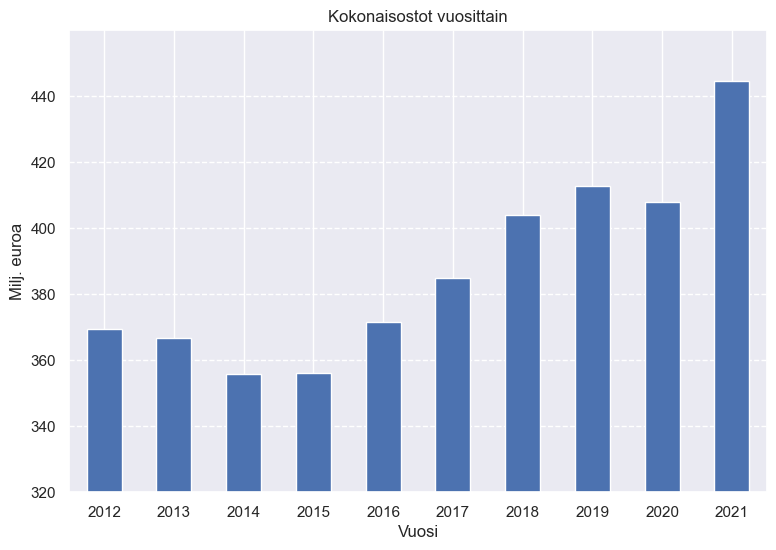

In [107]:
# Asetetaan kaavion pääotsikko ja selitteet akseleille:
plt.title('Kokonaisostot vuosittain')
plt.xlabel('Vuosi')
plt.ylabel('Milj. euroa')

# Asetetaan y-akselin alku- ja loppupiste ja asteikon välit:
plt.ylim(320, 460)
plt.yticks(np.arange(320, 460, 20))

# Luodaan halutun kokoinen pylväskaavio ostoista:
ostot.plot(kind = 'bar', figsize=(9, 6))

# Asetetaan ruudukko:
#plt.grid(axis = 'y', linestyle = '--')

# Asetetaan x-akselin vuosiluvut suoraan:
plt.xticks(rotation = 0)

#plt.grid(axis = 'y', linestyle = '--')

# Asetetaan keskiarvoviiva:


plt.show()

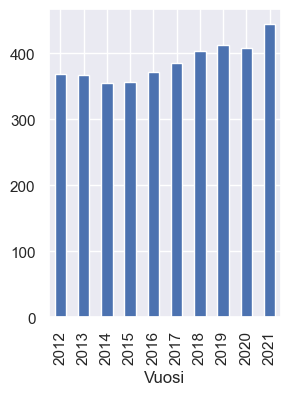

In [45]:
# Expanding:
df1['Low price'].plot()
df1['Low price'].expanding().mean().plot(label='average')
plt.ylim(3.5, 4.5)
plt.grid()
plt.legend()
plt.show()

df1['High price'].plot()
df1['High price'].expanding().mean().plot(label='average')
plt.ylim(3.5, 4.5)
plt.grid()
plt.legend()
plt.show()

Suurimmat ja pienimmät ostot joka vuodelta, keskimääräinen osto euroissa

In [37]:
df.groupby('Vuosi')['Nettosumma'].sum()

Vuosi
2012    3.693571e+08
2013    3.666067e+08
2014    3.557135e+08
2015    3.562868e+08
2016    3.716586e+08
2017    3.848667e+08
2018    4.039062e+08
2019    4.128080e+08
2020    4.080993e+08
2021    4.445487e+08
Name: Nettosumma, dtype: float64

In [38]:
# Kokeillaan muotoilla lukuja järkevämmiksi:
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')

df.groupby('Vuosi')['Nettosumma'].sum()


Vuosi
2012   369,357,095.220
2013   366,606,739.310
2014   355,713,542.743
2015   356,286,764.145
2016   371,658,563.110
2017   384,866,733.114
2018   403,906,204.730
2019   412,807,964.340
2020   408,099,288.550
2021   444,548,729.070
Name: Nettosumma, dtype: float64

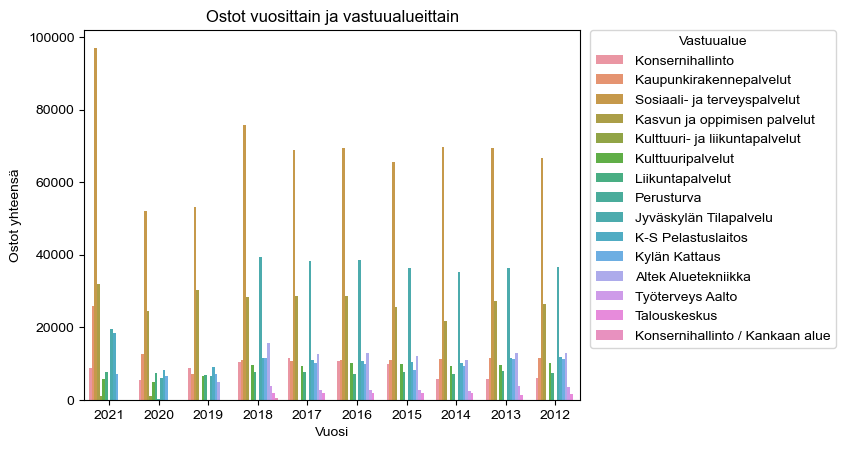

In [41]:
ax = sns.countplot(x = 'Vuosi', hue = 'Vastuualue', data = df)
plt.legend(title = 'Vastuualue', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.set(rc={"figure.figsize":(3, 4)}) 
ax.set_ylabel('Ostot yhteensä'), 
ax.set_title('Ostot vuosittain ja vastuualueittain')
plt.show()

In [ ]:
ax = sns.countplot(y='Mh', hue='Ft', data=df1)
ax.legend(title = 'Fuel type', loc = 'lower right')
ax.set_xlabel('Number of cars'), 
ax.set_ylabel('Manufacturer name'), 
ax.set_title('Number of cars by fuel type')
plt.grid(color = 'black', linestyle = '--')
plt.show()

In [ ]:
ax = sns.countplot(y='Mh', hue='Ft', data=df1)
ax.legend(title = 'Fuel type', loc = 'lower right')
ax.set_xlabel('Number of cars'), 
ax.set_ylabel('Manufacturer name'), 
ax.set_title('Number of cars by fuel type')
plt.grid(color = 'black', linestyle = '--')
plt.show()